# Compartmental model of a skeletal muscle

## Main reference: <a href="https://www.sciencedirect.com/science/article/pii/S0022519321000783#!"> Senneff and Lowrey, <em>Journal of Theoretical Biology </em>, 2020 </a>

### I. Sarcolemma Model

#### 1. Ionic currents
---
$$I_{ionic} = I_{Na} + I_{KDR} + I_{Cl} + I_{KIR} + I_{NaK}$$

##### 1. Sodium Current

$$I_{Na} = \bar{g}_{Na} \cdot m^3 \cdot h \cdot S \cdot (V_m - E_{Na})$$<br>
$$\frac{dS}{dt} = \frac{S_\infty - S}{\tau_S}$$ <br>
$$S_\infty = \frac{1}{1 + e^{\frac{V_m - V^\infty_S}{A^\infty_S}}}$$ <br>
$$\tau_S = \frac{60}{0.2 + 5.65 \Big(\frac{V_m + V_\tau}{100}\Big)}$$ <br>
$$\frac{dm}{dt} = \frac{\bar{\alpha}_m (V - V_m)}{1 - e^{-\frac{V - V_m}{K_{\alpha_{m}}}}} (1 - m) - \bar{\beta}_m e^{-\frac{V - V_{\beta_m}}{K_{\beta_m}}}m$$ <br>
$$\frac{dh}{dt} = \bar{\alpha}_h e^{-\frac{V - V_{\alpha_h}}{K_{\alpha_h}}} (1 - h) - \frac{\bar{\beta}_h}{1 - e^{-\frac{V - V_h}{K_{\alpha_{m}}}}}h$$


##### 2. Potassium current

$$I_{K} = \bar{g}_K \cdot n^4 \cdot h_K \cdot (V_m - E_K)$$ <br>
$$\frac{dh_K}{dt} = \frac{h_K^\infty - h_K}{\tau_{h_K}}$$ <br>
$$h_K^\infty = \frac{1}{1 + e^{\frac{V_m - V_{h_K}^\infty}{A_{h_K}^\infty}}}$$ <br>
$$\tau_{h_K} = \exp\Big(-(V_m + 40)/25.75\Big)$$


##### 3. Chloride Current
$$I_{Cl} = \bar{g}_{Cl} \cdot A^4 \cdot \Big(V_m - E_{Cl}\Big)$$ <br>
$$A = \frac{1}{1 + e^{\frac{V_m - V_a}{A_a}}}$$ <br>




##### Parameters for ion currents
---
Note: for initial simulations all the parameters correspond to the "Fast Twitch (FT)" muscles.

|Parameter|Unit|Definition|Value|Reference|
|:---------|:----|:----------|:-----|:-----|
|$$\bar{g}_{Na}$$| $$mScm^{-2}$$ | Maximum conductance of sodium channel|$$804$$|Senneff|
|$$\bar{g}_{K}$$ | $$mScm^{-2}$$ | Maximum conductance of potassium channel|$$64.8$$|Senneff|
|$$\bar{g}_{Cl}$$ | $$mScm^{-2}$$ | Maximum conductance of chloride channel|$$19.65$$|Senneff|
|$$G_K$$|  $$mScm^{-2}$$ |Maximum conductance of chloride channel|$$11.1$$|Senneff|
|$$\bar{J}_{NaK}$$|$$\frac{\mu \cdot mol}{cm^2 s}$$| Maximum conductance of Na-K Pump| $$6.21 \times 10^{-4}$$| Senneff|
|$$\alpha_m$$|$$\frac{1}{ms \cdot mV}$$| Maximum forward rate constant for $m$| $$0.288$$| Senneff|
|$$\beta_m$$|$$\frac{1}{ms}$$|Maximum backward rate constant for $m$|$$1.38$$|Senneff|
|$$\alpha_h$$|$$\frac{1}{ms \cdot mV}$$| Maximum forward rate constant for $h$| $$0.0081$$| Senneff|
|$$\beta_h$$|$$\frac{1}{ms}$$|Maximum backward rate constant for $m$|$$4.38$$|Senneff|
|$$\alpha_n$$|$$\frac{1}{ms \cdot mV}$$| Maximum forward rate constant for $n$| $$0.0131$$| Senneff|
|$$\beta_h$$|$$\frac{1}{ms}$$|Maximum backward rate constant for $m$|$$4.38$$|Senneff|
|$$V^m_{0.5}$$|$$\frac{1}{ms \cdot mV}$$|Half-maximal voltage for $m$|$$-46$$|Senneff|
|$$K_{\alpha_m}$$|$$\frac{1}{ms}$$|Steepness factor for $m$|$$10$$|Senneff|
|$$K_{\beta_m}$$|$$\frac{1}{ms}$$|Slope factor for $m$|$$18$$|Senneff|
|$$V_h$$|$$\frac{1}{ms}$$|Half maximal voltage for $h$|$$-45$$|Senneff|
|$$K_{\alpha_h}$$|$$\frac{1}{ms}$$|Steepness factor for $h$|$$14.7$$|Senneff|
|$$K_{\beta_h}$$|$$\frac{1}{ms}$$|Slope factor for $h$|$$9$$|Senneff|
|$$V^\infty_S$$|$$mV$$|Half maximal voltage for $S$|$$-78$$|Senneff|
|$$V_\tau$$|$$mV$$|Half maximal voltage for $S$|$$90$$|Senneff|
|$$A^\infty_S$$|$$mV$$|Steepness factor for $S$|$$5.8$$|Senneff|
|$$V_n$$|$$mV$$|Half maximal voltage for $n$|$$-40$$|Senneff|
|$$K_{\alpha_n}$$|$$mV$$|Steepness factor for $n$|$$7$$|Senneff|
|$$K_{\beta_n}$$|$$mV$$|Slope factor for $n$|$$40$$|Senneff|
|$$V_a$$|$$mV$$|Half-maximal voltage for $a$|$$70$$|Senneff|
|$$A_a$$|$$mV$$|Steepness factor for $a$|$$150$$|Senneff|
|$$E_{Na}$$|$$mV$$|Sodium channel Nernst Potential|$$59.3$$|Wallinga|
|$$E_{K}$$|$$mV$$|Potassium channel Nernst potential|$$-81.8$$|Wallinga|
|$$E_{Cl}$$|$$mV$$|Chloride channel Nernst potential|$$-78.3$$|Wallinga|

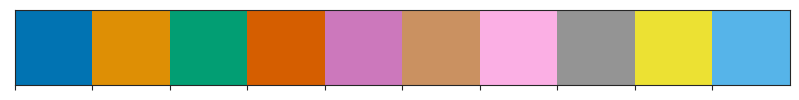

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from scipy.integrate import solve_ivp, odeint
import os
sns.set_style("ticks")
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.family"] = "ariel"
qcolors = ["#C6D57E", "#D57E7E", "#A2CDCD", "#FFE1AF"]
#qPal = sns.color_palette(sns.set_palette(qcolors))
qPal = sns.color_palette(sns.set_palette("colorblind"))
sns.palplot(qPal)

In [35]:
class Skeletal_muscle:
    """ This class contains the parameters and equations describing dynamics of a skeletal muscle. The class is broken into following parts:
    1. Sarcolemma Model: - Contains ionic currents modeled with Hodgkin-Huxley-like conductance based equations. (UNDER CONSTRUCTION)
    2. Transverse tubule (T-tubule) Model: - Containts the T-tubule ion channels and voltage-gated calcium channels. (UNDER CONSTRUCTION)
    3. Sarcoplasmic Reticulum: - Consists of ryanodine receptors, IP3 receptors and SERCA Pumps. (UNDER CONSTRUCTION)
    4. Mitochondria (UNDER CONSTRUCTION)
    """
    ########################################## defining constants ##################################################
    
    ########### 1. Sodium conductance/channel
    g_max_Na = 804                   # mS.cm^-2; peak sodium conductance
    E_Na = 59.3                      # mV; Sodium channel Nernst Potential
    α_max_m = 0.288                  # (ms.mV)^-1; Maximum forward rate constant for m
    β_max_m = 1.38                   # ms^-1; Maximum backward rate constant for m
    α_max_h = 0.0081                 # ms^-1; Maximum forward rate constant for h
    β_max_h = 0.067                  # ms^-1; Maximum backward rate constant for h
    V_half_m = -46                   # mV; Half-maximum voltage for m
    K_alpha_m = 10                   # ms^-1; Steepness factor for m
    K_beta_m = 18                    # ms^-1: Slope factor for m
    V_half_h = -45                   # mV; Half-maximum voltage for h
    K_alpha_h = 14.7                 # (ms.mV)^-1; Steepness factor for h
    K_beta_h = 9                     # ms^-1; Slope factor for h
    V_half_S = -78                   # mV; Half-maximal voltage for S
    A_S = 5.8                        # mV; Steepness factorfor S
    V_tau = 90                       # Half-maximum voltage for τ_s
    
    ########## 2. Potassium conductance/channel
    g_max_K = 64.8                   # mS.cm^-2; peak potassium conductance
    E_K = -81.8                      # mV; Potassium channel Nernst Potential
    α_max_n = 0.0131                 # (ms.mV)^-1; Maximum forward rate constant for n
    β_max_n = 0.067                  # ms^-1; Maximum backward rate constant for n
    V_half_n = -40                   # mV; Half-maximum voltage for n
    K_alpha_n = 7                    # mV; steepness factor for n
    K_beta_n = 40                    # mV; Slope factor for n
    V_half_hk = -40                  # mV; Half-maximum voltage for hk
    A_hk = 7.5                       # mV; Steepness factor for hk
    
    ######### 3. Chloride conductance/channel
    g_max_Cl = 19.65                 # mS.cm^-2; Maximum conductance of Cl- channel
    E_Cl = -78.3                     # mV; Potassium channel Nernst Potential
    V_half_a = 70                    # mV; Half-maximum voltage for a
    A_a = 150                        # mV; Steepness factor for a
    
    
    
    
    ##################################### Functions ##############################################################
    def na_gating_vars(self, V):
        """This function takes the membrane voltage as input and returns α_m, β_m, α_h and β_h. Functions taken from Senneff and Lowrey 2020."""
    
        a_m = (self.α_max_m*(V - self.V_half_m))/(1 - np.exp((-(V - self.V_half_m))/(self.K_alpha_m)))
        b_m = self.β_max_m*np.exp(-(V - self.V_half_m)/(self.K_beta_m))
        a_h = self.α_max_h*np.exp(-(V - self.V_half_h)/(self.K_beta_h))
        b_h = (self.β_max_h)/(1 + np.exp(-(V - self.V_half_h)/(self.K_beta_h)))
        
        return a_m, b_m, a_h, b_h
    
    def na_slow_inactivation_vars(self, V):
        """This function takes membrane voltage as input and returns S_inf and τ_S variables of the sodium channel slow inactivation."""

        S_inf = 1/(1 + np.exp((V - self.V_half_S)/(self.A_S)))
        tau_S = (60)/(0.2 + 5.56*(np.power((V + self.V_tau), 2)/(100)))

        return S_inf, tau_S
    
    def k_gating_vars(self, V):
        """This function takes membrane voltage as input and returns α_n and β_n (Potassium gating variables). Functions taken from Senneff and Lowrey 2020."""
        a_n = (self.α_max_n*(V - self.V_half_n))/(1 - np.exp(-(V - self.V_half_n)/(self.K_alpha_n)))
        b_n = self.β_max_n*np.exp(-(V - self.V_half_n)/(self.K_beta_n))
        
        return a_n, b_n
    
    def h_K_inf(self, V):
        """This function takes membrane voltage V as input and returns h_K_inf parameter for slow K channel inactivation. Functions taken from Senneff and Lowrey 2020."""
        return 1/(1 + np.exp((V - self.V_half_hk)/(self.A_hk)))
    
    def tau_h_K(self, V):
        """This function takes membrane voltage V as input and returns the time constant τ_hK for K-channel slow inactivation"""
        return np.exp(-(V + 40)/25.75)
    
    def A_boltzmann(self, V):
        """This function takes membrane voltage V as input and returns the Boltzmann-function for activation of Cl- channel"""
        return 1/(1 + np.exp((V - self.V_half_a)/(self.A_a)))
    
    
    
    
    
    
    
    
    
    
    

    
    
    
    
    
    

In [38]:
Skeletal_muscle.__doc__

' This class contains the parameters and equations describing dynamics of a skeletal muscle. The class is broken into following parts:\n    1. Sarcolemma Model: - Contains ionic currents modeled with Hodgkin-Huxley-like conductance based equations. (UNDER CONSTRUCTION)\n    2. Transverse tubule (T-tubule) Model: - Containts the T-tubule ion channels and voltage-gated calcium channels. (UNDER CONSTRUCTION)\n    3. Sarcoplasmic Reticulum: - Consists of ryanodine receptors, IP3 receptors and SERCA Pumps. (UNDER CONSTRUCTION)\n    4. Mitochondria (UNDER CONSTRUCTION)\n    '

Text(0.5, 0, 'Time')

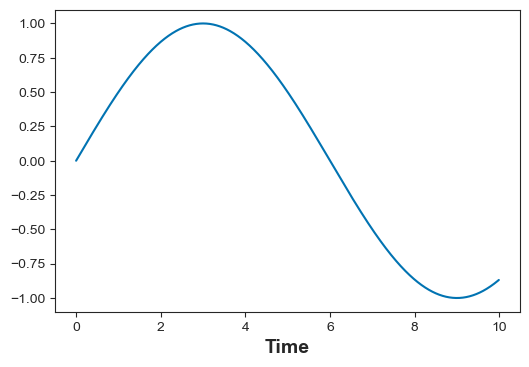

In [50]:
b = np.arange(0., 10., 0.01)
a = np.sin(b*np.pi/6)
sns.lineplot(x=b,y=a)
plt.xlabel(r"Time")